# Price Level Histories

# 价格水平历史

This lecture offers some historical evidence about fluctuations in levels of aggregate price indexes.

本次讲座提供了一些关于总体价格指数水平波动的历史证据。

Let’s start by installing the necessary Python packages.

让我们从安装必要的 Python 包开始。

The `xlrd` package is used by `pandas` to perform operations on Excel files.

`pandas` 使用 `xlrd` 包来对 Excel 文件执行操作。


In [6]:
# 安装xlrd库，用于读取Excel文件
!pip install xlrd

In [7]:
# 导入版本管理相关模块
from importlib.metadata import version
from packaging.version import Version

# 检查当前pandas版本是否低于2.1.4，如果是则安装指定版本
if Version(version("pandas")) < Version('2.1.4'):
    !pip install "pandas>=2.1.4"

We can then import the Python modules we will use.

然后我们可以导入将要使用的Python模块。


In [8]:
# 导入NumPy库，用于数值计算
import numpy as np
# 导入Pandas库，用于数据处理和分析
import pandas as pd
# 导入Matplotlib的pyplot模块，用于绘图
import matplotlib.pyplot as plt
# 导入Matplotlib的dates模块，用于处理日期格式
import matplotlib.dates as mdates

The rate of growth of the price level is called **inflation** in the popular press and in discussions among central bankers and treasury officials.

价格水平的增长速度在通俗媒体以及中央银行家和财政部官员的讨论中被称为**通货膨胀**。

The price level is measured in units of domestic currency per units of a representative bundle of consumption goods.

价格水平是以每单位代表性消费商品所需的国内货币单位来衡量的。

Thus, in the US, the price level at $ t $ is measured in dollars (month $ t $ or year $ t $) per unit of the consumption bundle.

因此，在美国，时间点 $ t $ 的价格水平是以每单位消费组合的美元（月份 $ t $ 或年份 $ t $）来衡量的。

Until the early 20th century, in many western economies, price levels fluctuated from year to year but didn’t have much of a trend.

直到20世纪初，在许多西方经济体中，价格水平每年都有波动，但没有明显的趋势。

Often the price levels ended a century near where they started.

通常，一个世纪结束时的价格水平与开始时相差无几。

Things were different in the 20th century, as we shall see in this lecture.

在20世纪，情况有所不同，我们将在本次讲座中详细探讨。

A widely believed explanation of this big difference is that countries’ abandoning gold and silver standards in the early twentieth century.

人们普遍认为，造成这一巨大差异的原因是各国在二十世纪初放弃了金本位和银本位制度。

This lecture sets the stage for some subsequent lectures about a theory that macro economists use to think about determinants of the price level, namely, [A Monetarist Theory of Price Levels](https://intro.quantecon.org/cagan_ree.html) and [Monetarist Theory of Price Levels with Adaptive Expectations](https://intro.quantecon.org/cagan_adaptive.html)

本次讲座为后续几场关于宏观经济学家用来思考价格水平决定因素的理论奠定了基础，具体包括：[价格水平的货币主义理论](https://intro.quantecon.org/cagan_ree.html) 和 [适应性预期下的价格水平货币主义理论](https://intro.quantecon.org/cagan_adaptive.html)。


## Four centuries of price levels

## 四个世纪的价格水平

We begin by displaying data that originally appeared on page 35 of [[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)] that show price levels for four “hard currency” countries from 1600 to 1914.

我们首先展示的数据最初出现在[[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)]一书的第35页，这些数据显示了从1600年到1914年间四个“硬通货”国家的价格水平。

- France  

法国
- Spain (Castile)  

- 西班牙（卡斯蒂利亚）
- United Kingdom  

- 英国
- United States  

- 美国


In the present context, the  phrase “hard currency” means that the countries were on a commodity-money standard:  money consisted of gold and silver coins that circulated at values largely determined by the weights of their gold and silver contents.

在当前语境下，“硬通货”这一短语意味着这些国家实行的是商品货币本位制：货币由金币和银币组成，其流通价值主要取决于其所含金、银的重量。

>**Note**

>**注意**
>

请提供需要翻译的文本。
>Under a gold or silver standard, some money also consisted of “warehouse certificates” that represented paper claims on gold or silver coins. Bank notes issued by the government or private banks can be viewed as examples of such “warehouse certificates”.

在金本位或银本位制度下，部分货币也由“仓库凭证”组成，这些凭证代表了对金币或银币的纸质索取权。由政府或私人银行发行的纸币可以被视为这类“仓库凭证”的实例。

Let us bring the data into pandas from a spreadsheet that is [hosted on github](https://github.com/QuantEcon/lecture-python-intro/tree/main/lectures/datasets).

让我们从一个托管在 [GitHub](https://github.com/QuantEcon/lecture-python-intro/tree/main/lectures/datasets) 上的电子表格中将数据导入到 pandas 中。


In [9]:
# 导入数据并清理索引
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/longprices.xls"
df_fig5 = pd.read_excel(data_url, 
                        sheet_name='all', 
                        header=2, 
                        index_col=0).iloc[1:]  # 读取Excel文件，指定表名、表头行和索引列，并跳过第一行
df_fig5.index = df_fig5.index.astype(int)  # 将索引转换为整数类型

We first plot price levels over the period 1600-1914.

我们首先绘制了1600年至1914年期间的价格水平图表。

During most years in this time interval, the countries were on a gold or silver standard.

在这一时间区间内的大多数年份，各国都实行金本位或银本位制。


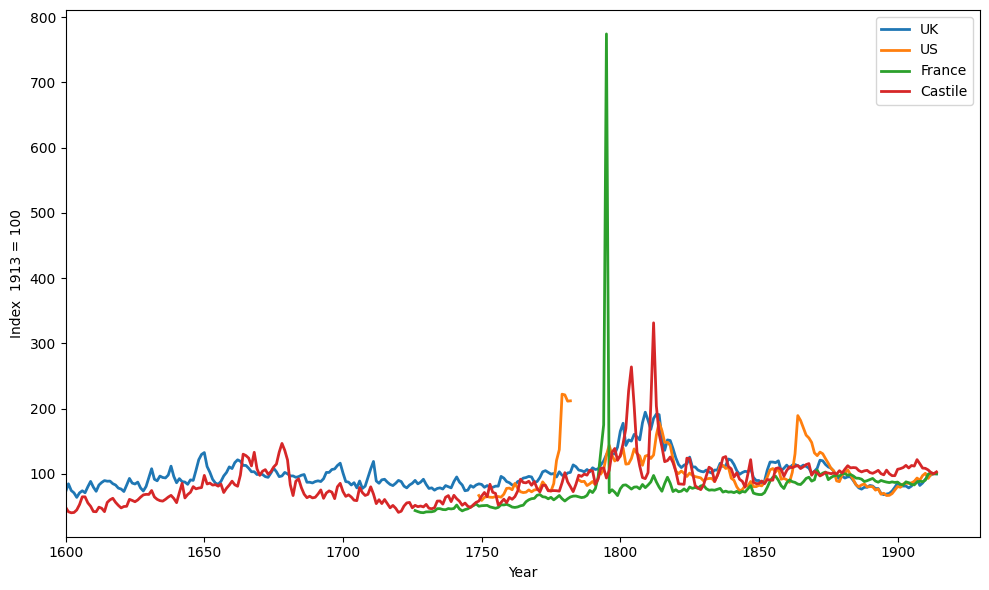

In [26]:
# 筛选1914年及之前的数据
df_fig5_befe1914 = df_fig5[df_fig5.index <= 1914]

# 创建绘图
cols = ['UK', 'US', 'France', 'Castile']

fig, ax = plt.subplots(figsize=(10,6))

# 绘制每个国家的数据
for col in cols:
    ax.plot(df_fig5_befe1914.index, 
            df_fig5_befe1914[col], label=col, lw=2)

# 添加图例
ax.legend()
# 设置y轴标签
ax.set_ylabel('Index  1913 = 100')
# 设置x轴标签
ax.set_xlabel('Year')
# 设置x轴最小值为1600
ax.set_xlim(xmin=1600)
# 调整布局
plt.tight_layout()
# 显示图形
plt.show()

We say “most years” because there were temporary lapses from the gold or silver standard.

我们说“大多数年份”是因为曾经有过暂时脱离金本位或银本位的情况。

By staring at Fig. 4.1 carefully, you might be able to guess when these temporary lapses occurred, because they were also times during which price levels temporarily rose markedly:

通过仔细观察图4.1，你或许能够猜出这些暂时的失误发生在何时，因为这些时期也是价格水平显著暂时上涨的时期。

- 1791-1797 in France (French Revolution)  

1791-1797年在法国（法国大革命）
- 1776-1790 in the US (War for Independence from Great Britain)  

- 1776-1790年在美国（从大不列颠独立战争）
- 1861-1865 in the US (Civil War)  

1861-1865年在美国（南北战争）


During these episodes, the gold/silver standard was temporarily abandoned when a government printed paper money to pay for war expenditures.

在这些时期，当政府印制纸币以支付战争开支时，金/银本位制会被暂时放弃。

>**Note**

>**注意**
>

请提供需要翻译的文本。
>This quantecon lecture [Inflation During French Revolution](https://intro.quantecon.org/french_rev.html) describes circumstances leading up to and during the big inflation that occurred during the French Revolution.

这篇关于法国大革命期间通货膨胀的量化经济学讲座 [法国大革命期间的通货膨胀](https://intro.quantecon.org/french_rev.html) 描述了导致法国大革命期间大规模通货膨胀的背景及其发生时的具体情况。

Despite these temporary lapses, a striking thing about the figure is that price levels were roughly constant over three centuries.

尽管存在这些暂时的波动，但这一数据中一个引人注目的事实是，价格水平在三个世纪中大致保持稳定。

In the early century, two other features of this data attracted the attention of [Irving Fisher](https://en.wikipedia.org/wiki/Irving_Fisher) of Yale University and [John Maynard Keynes](https://en.wikipedia.org/wiki/John_Maynard_Keynes) of Cambridge University.

在本世纪初，这一数据的另外两个特征引起了耶鲁大学的[欧文·费雪](https://en.wikipedia.org/wiki/Irving_Fisher)和剑桥大学的[约翰·梅纳德·凯恩斯](https://en.wikipedia.org/wiki/John_Maynard_Keynes)的注意。

- Despite being anchored to the same average level over long time spans, there were considerable year-to-year variations in price levels  

尽管长期来看价格水平基本保持在同一平均水平，但每年之间仍存在显著的价格波动。
- While using valuable gold and silver as coins succeeded in anchoring the price level by limiting the supply of money, it cost real resources.  

尽管使用贵重的金银作为货币通过限制货币供应成功地稳定了物价水平，但这消耗了实际资源。
- a country paid a high “opportunity cost” for using gold and silver coins as money – that gold and silver could instead have been made into valuable jewelry and other durable goods.  

一个国家使用金银币作为货币支付了高昂的“机会成本”——这些金银本可以用来制作成珍贵的珠宝和其他耐用品。


Keynes and Fisher proposed what they claimed would be a more efficient way to achieve a price level that

凯恩斯和费雪提出了一种他们声称更为有效的方法，以实现价格水平的稳定。

- would be at least as firmly anchored as achieved under a gold or silver standard, and  

- 将至少与金本位或银本位制度下所实现的稳定性一样牢固，并且
- would also exhibit less year-to-year short-term fluctuations.  

- 也会表现出较少的逐年短期波动。


They said that central bank could achieve price level stability by

他们说中央银行可以通过

- issuing  **limited supplies** of paper currency  

发行**有限供应**的纸币
- refusing to print money to finance government expenditures  

拒绝印钞以资助政府支出


This logic prompted John Maynard Keynes to call a commodity standard a “barbarous relic.”

这种逻辑促使约翰·梅纳德·凯恩斯将商品标准称为“野蛮的遗迹”。

A paper currency or “fiat money” system disposes of all reserves behind a currency.

纸币或“法定货币”体系摒弃了货币背后的所有储备。

But adhering to a gold or silver standard had provided an automatic mechanism for limiting the supply of money, thereby anchoring the price level.

但坚持金本位或银本位为限制货币供应提供了一种自动机制，从而稳定了价格水平。

To anchor the price level, a pure paper or fiat money system replaces that automatic mechanism with a central bank with the authority and determination to limit the supply of money (and to deter counterfeiters!)

为了稳定物价水平，纯粹的纸币或法定货币体系取代了自动调节机制，转而依靠中央银行，该银行拥有限制货币供应（并打击伪造者）的权威和决心。

Now let’s see what happened to the price level in the four countries after 1914, when one after another of them left the gold/silver standard by showing the complete graph that originally appeared on page 35 of [[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)].

现在，让我们看看1914年之后这四个国家的物价水平发生了什么变化，当时它们一个接一个地脱离了金/银本位制。我们将展示最初出现在[[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)]第35页的完整图表。

Fig. 4.2 shows the logarithm of price levels over four “hard currency” countries from 1600 to 2000.

图4.2展示了从1600年到2000年四个“硬通货”国家价格水平的对数变化。

>**Note**

>**注意**
>

请提供需要翻译的文本内容。
>Although we didn’t have to use logarithms in our earlier graphs that had stopped in 1914, we now choose to use logarithms because we want to fit observations after 1914 in the same graph as the earlier observations.

尽管在我们之前截止于1914年的图表中无需使用对数，但我们现在选择使用对数，因为我们希望将1914年后的观测数据与之前的观测数据整合在同一张图表中。

After the outbreak of the Great War in 1914, the four countries left the gold standard and in so doing acquired the ability to print money to finance government expenditures.

1914年第一次世界大战爆发后，这四个国家放弃了金本位制，从而获得了通过印钞来为政府支出提供资金的能力。


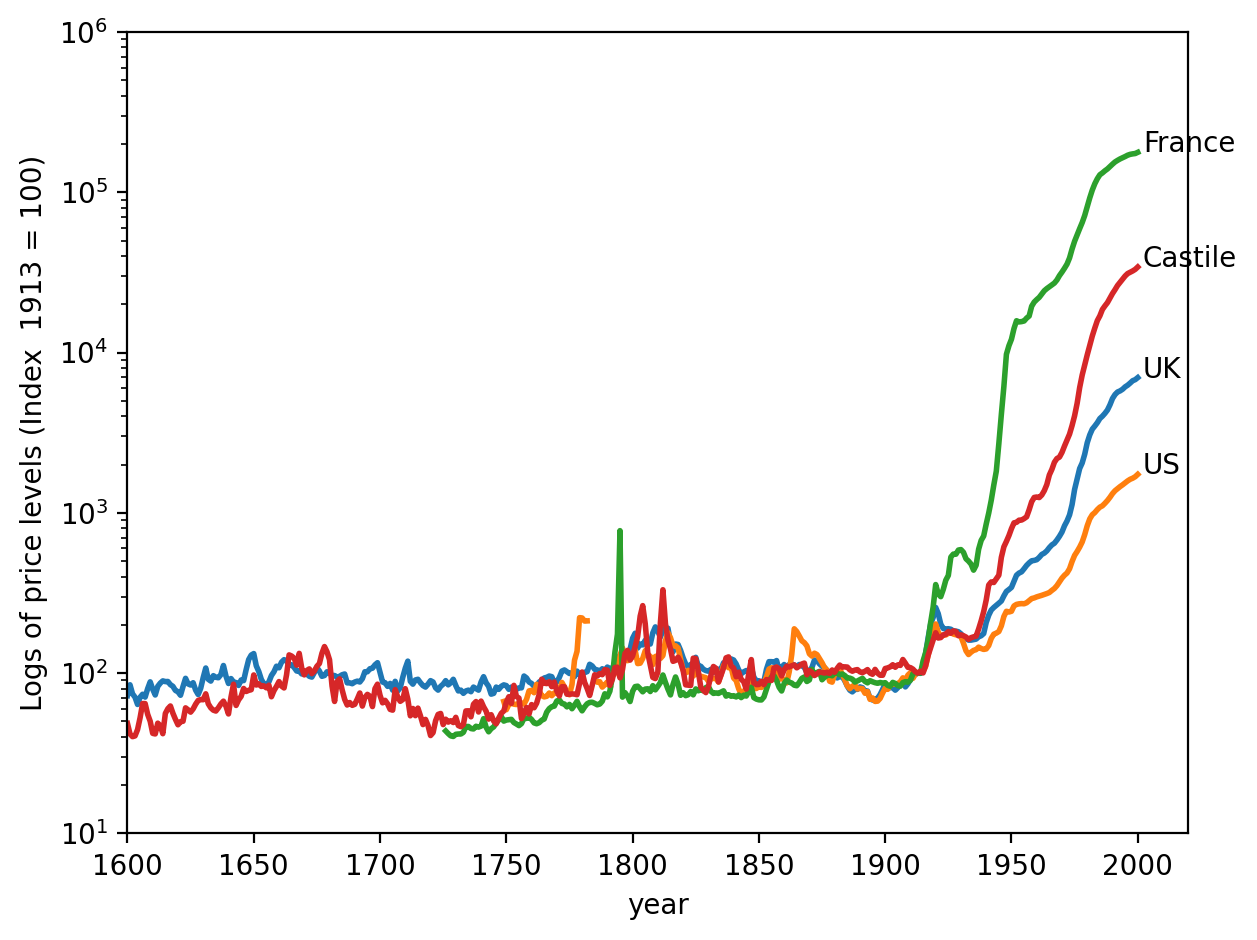

In [11]:
# 创建高分辨率绘图
fig, ax = plt.subplots(dpi=200)

# 绘制每个国家的价格水平曲线，并在末尾添加标签
for col in cols:
    ax.plot(df_fig5.index, df_fig5[col], lw=2)
    ax.text(x=df_fig5.index[-1]+2, 
            y=df_fig5[col].iloc[-1], s=col)

# 设置y轴为对数刻度
ax.set_yscale('log')
# 设置y轴标签
ax.set_ylabel('Logs of price levels (Index  1913 = 100)')
# 设置y轴范围
ax.set_ylim([10, 1e6])
# 设置x轴标签
ax.set_xlabel('year')
# 设置x轴范围
ax.set_xlim(xmin=1600)
# 调整布局以避免重叠
plt.tight_layout()
# 显示图形
plt.show()

Fig. 4.2 shows that paper-money-printing central banks didn’t do as well as the gold and standard silver standard in anchoring price levels.

图4.2显示，在稳定价格水平方面，发行纸币的中央银行表现不如金本位和银本位制度。

That would probably have surprised or disappointed Irving Fisher and John Maynard Keynes.

这可能会让欧文·费雪和约翰·梅纳德·凯恩斯感到惊讶或失望。

Actually, earlier economists and statesmen knew about the possibility of fiat money systems long before Keynes and Fisher advocated them in the early 20th century.

事实上，早在凯恩斯和费雪在20世纪初倡导法定货币体系之前，早期的经济学家和政治家们就已经了解这种可能性了。

Proponents of a commodity money system did not trust governments and central banks properly to manage a fiat money system.

支持商品货币体系的人士不信任政府和中央银行能够妥善管理法定货币体系。

They were willing to pay the resource costs associated with setting up and maintaining a commodity money system.

他们愿意承担建立和维护商品货币体系所需的资源成本。

In light of the high and persistent inflation that many countries experienced after they abandoned commodity monies in the twentieth century, we hesitate to criticize advocates of a gold or silver standard for their preference to stay on the pre-1914 gold/silver standard.

鉴于许多国家在二十世纪放弃商品货币后经历的高企且持续的通胀，我们对那些主张维持1914年前金本位或银本位制度的人士的偏好持保留态度，不愿轻易批评。

The breadth and lengths of the inflationary experiences of the twentieth century under paper money fiat standards are historically unprecedented.

在纸币法定标准下，二十世纪通货膨胀的广度和长度在历史上是前所未有的。


## Four big inflations

## 四次大通胀

In the wake of World War I, which ended in November 1918, monetary and fiscal authorities struggled to achieve price level stability without being on a gold or silver standard.

第一次世界大战于1918年11月结束，此后，货币和财政当局在脱离金本位或银本位的情况下，努力实现价格水平的稳定。

We present four graphs from “The Ends of Four Big Inflations” from chapter 3 of [[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)].

我们从[[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)]的第三章《四次大通胀的终结》中展示了四张图表。

The graphs depict logarithms of price levels during the early post World War I years for four countries:

图表描绘了第一次世界大战后初期四个国家价格水平的对数变化：

- Figure 3.1, Retail prices Austria, 1921-1924 (page 42)  

图3.1，奥地利零售价格，1921-1924年（第42页）
- Figure 3.2, Wholesale prices Hungary, 1921-1924 (page 43)  

- 图3.2，匈牙利批发价格，1921-1924年（第43页）
- Figure 3.3, Wholesale prices, Poland, 1921-1924 (page 44)  

图3.3，波兰批发价格，1921-1924年（第44页）
- Figure 3.4, Wholesale prices, Germany, 1919-1924 (page 45)  

图3.4，德国批发价格，1919-1924年（第45页）


We have added logarithms of the exchange rates vis-à-vis the US dollar to each of the four graphs

我们已在四张图表中分别添加了相对于美元汇率的对数数据。
from chapter 3 of [[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)].

摘自[[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)]第3章。

Data underlying our graphs appear in tables in an appendix to chapter 3 of [[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)].

我们图表所依据的数据出现在[[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)]第3章附录的表格中。
We have transcribed all of these data into a spreadsheet <a href=https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx download>chapter_3.xlsx</a> that we read into pandas.

我们已经将所有数据转录到一个电子表格中，并将其读入pandas。该电子表格的下载链接为：<a href=https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx download>chapter_3.xlsx</a>。

In the code cell below we clean the data and build a `pandas.dataframe`.

在下面的代码单元中，我们清理数据并构建一个 `pandas.dataframe`。


In [12]:
def process_entry(entry):
    "Clean each entry of a dataframe."
    
    if type(entry) == str:
        # 去除首尾空白字符
        entry = entry.strip()
        # 去除逗号
        entry = entry.replace(',', '')
    
        # 去除HTML标记
        item_to_remove = ['<s>a</s>', '<s>c</s>', 
                          '<s>d</s>', '<s>e</s>']

        # <s>b</s> 表示十亿
        if '<s>b</s>' in entry:
            entry = entry.replace('<s>b</s>', '')
            entry = float(entry) * 1e9
        else:
            for item in item_to_remove:
                if item in entry:
                    entry = entry.replace(item, '')
    return entry

def process_df(df):
    "Clean and reorganize the entire dataframe."
    
    # 从列名中去除HTML标记
    for item in ['<s>a</s>', '<s>c</s>', '<s>d</s>', '<s>e</s>']:
        df.columns = df.columns.str.replace(item, '')
        
    # 将年份转换为整数
    df['Year'] = df['Year'].apply(lambda x: int(x))
    
    # 将索引设置为包含年份和月份的日期时间格式
    df = df.set_index(
            pd.to_datetime(
                (df['Year'].astype(str) + \
                 df['Month'].astype(str)), 
                format='%Y%B'))
    df = df.drop(['Year', 'Month'], axis=1)
    
    # 处理重复项，保留第一个
    df = df[~df.index.duplicated(keep='first')]
    
    # 将属性值转换为数值类型
    df = df.map(lambda x: float(x) \
                if x != '—' else np.nan)
    
    # 最后，我们只关注1919年到1925年之间的数据
    mask = (df.index >= '1919-01-01') & \
           (df.index < '1925-01-01')
    df = df.loc[mask]

    return df

Now we write plotting functions `pe_plot` and `pr_plot` that will build figures that show the price level, exchange rates,

现在我们编写绘图函数 `pe_plot` 和 `pr_plot`，这些函数将生成显示价格水平和汇率的图表，
and inflation rates, for each country of interest.

以及每个相关国家的通货膨胀率。


In [28]:
def pe_plot(p_seq, e_seq, index, labs, ax):
    "生成价格和汇率的图表。"

    p_lab, e_lab = labs
    
    # 绘制价格和汇率曲线
    ax.plot(index, p_seq, label=p_lab, color='tab:blue', lw=2)
    
    # 添加一个新的坐标轴
    ax1 = ax.twinx()
    ax1.plot([None], [None], label=p_lab, color='tab:blue', lw=2)
    ax1.plot(index, e_seq, label=e_lab, color='tab:orange', lw=2)
    
    # 设置对数坐标轴
    ax.set_yscale('log')
    ax1.set_yscale('log')
    
    # 定义坐标轴标签格式
    ax.xaxis.set_major_locator(
        mdates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%b %Y'))
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    # 设置标签
    ax.set_ylabel('price level')
    ax1.set_ylabel('exchange rate')
  
    ax1.legend(loc='upper left')
    
    return ax1

def pr_plot(p_seq, index, ax):
    "生成通货膨胀率的图表。"

    # 计算对数价格序列的差分
    log_diff_p = np.diff(np.log(p_seq))
    
    # 计算并绘制移动平均线
    diff_smooth = pd.DataFrame(log_diff_p).rolling(3, center=True).mean()
    ax.plot(index[1:], diff_smooth, label='moving average (3 months)', alpha=0.5, lw=2)
    ax.set_ylabel('inflation rate')
    
    ax.xaxis.set_major_locator(
        mdates.MonthLocator(interval=5))
    ax.xaxis.set_major_formatter(
        mdates.DateFormatter('%b %Y'))
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    ax.legend()
    
    return ax

We prepare the data for each country

我们为每个国家准备数据。


In [29]:
# 导入数据
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/chapter_3.xlsx"
xls = pd.ExcelFile(data_url)

# 选择相关的工作表
sheet_index = [(2, 3, 4), 
               (9, 10), 
               (14, 15, 16), 
               (21, 18, 19)]

# 移除冗余行
remove_row = [(-2, -2, -2), 
              (-7, -10), 
              (-6, -4, -3), 
              (-19, -3, -6)]

# 解包并合并每个国家的数据序列
df_list = []

for i in range(4):
    
    indices, rows = sheet_index[i], remove_row[i]
    
    # 在选定的工作表上应用process_entry函数
    sheet_list = [
        pd.read_excel(xls, 'Table3.' + str(ind), 
            header=1).iloc[:row].map(process_entry)
        for ind, row in zip(indices, rows)]
    
    sheet_list = [process_df(df) for df in sheet_list]
    df_list.append(pd.concat(sheet_list, axis=1))

df_aus, df_hun, df_pol, df_deu = df_list

Now let’s construct graphs for our four countries.

现在，让我们为我们的四个国家构建图表。

For each country, we’ll plot two graphs.

对于每个国家，我们将绘制两张图表。

The first graph plots logarithms of

第一张图绘制了对数

- price levels  

- 价格水平
- exchange rates vis-à-vis US dollars  

- 相对于美元的汇率


For each country, the scale on the right side of a graph will pertain to the price level while the scale on the left side of a graph will pertain to the exchange rate.

对于每个国家，图表右侧的刻度将表示价格水平，而图表左侧的刻度将表示汇率。

For each country, the second graph plots a centered three-month moving average of the inflation rate defined as $ \frac{p_{t-1} + p_t + p_{t+1}}{3} $.

对于每个国家，第二张图绘制了以三个月为周期的移动平均通胀率，其计算公式为 $ \frac{p_{t-1} + p_t + p_{t+1}}{3} $。


### Austria

### 奥地利

The sources of our data are:

我们的数据来源是：

- Table 3.3, retail price level $ \exp p $  

表3.3，零售价格水平 $ \exp p $
- Table 3.4, exchange rate with US  

表3.4，与美元的汇率


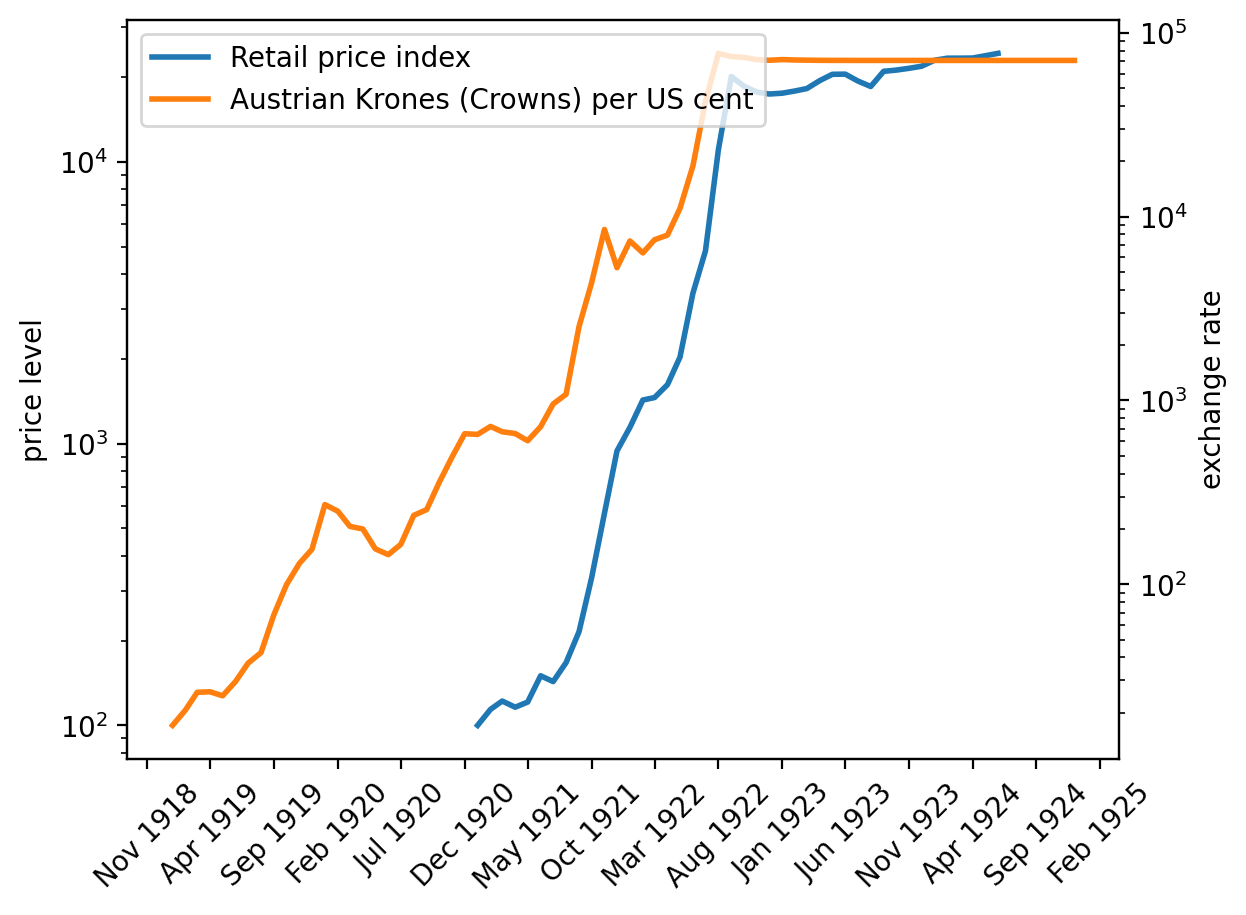

In [30]:
# 获取奥地利零售价格指数和汇率数据
p_seq = df_aus['Retail price index, 52 commodities']
e_seq = df_aus['Exchange Rate']

# 定义图例标签
lab = ['Retail price index', 
       'Austrian Krones (Crowns) per US cent']

# 创建绘图
fig, ax = plt.subplots(dpi=200)
_ = pe_plot(p_seq, e_seq, df_aus.index, lab, ax)

# 显示图形
plt.show()

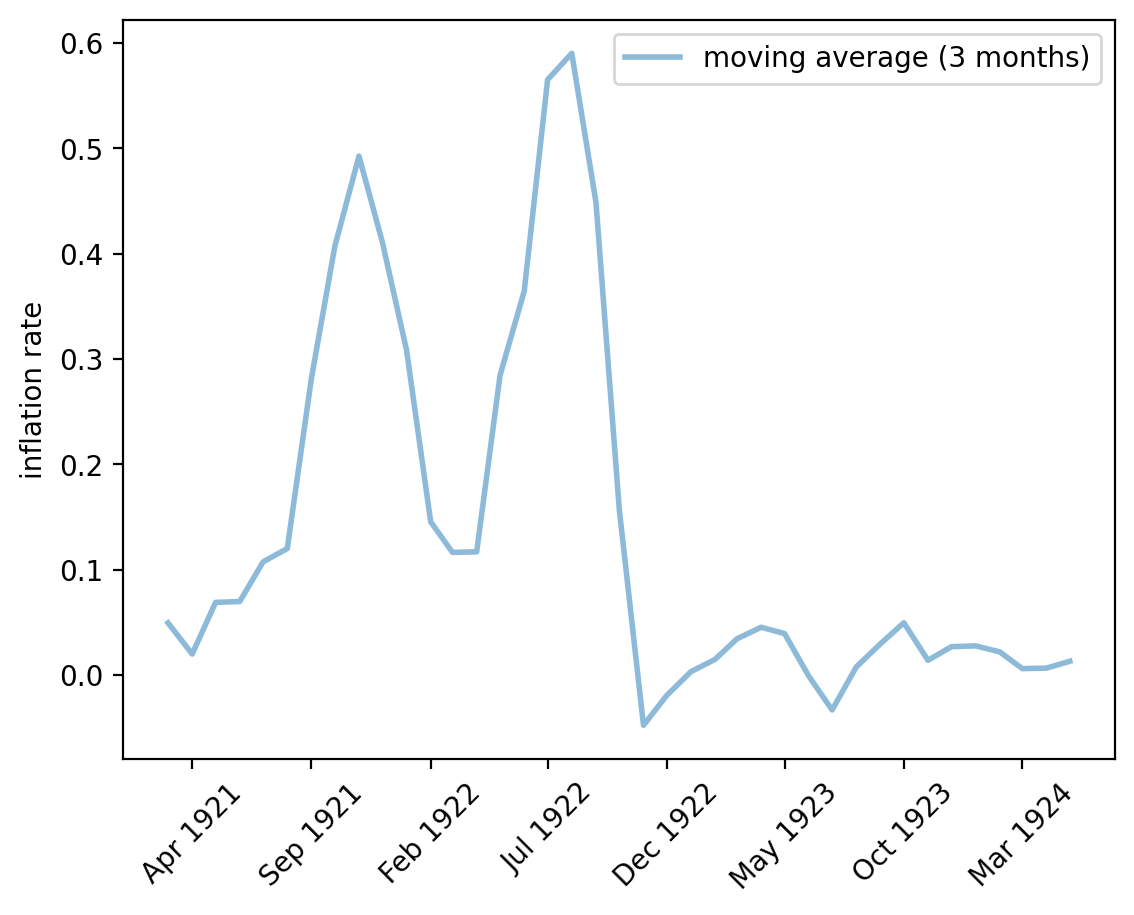

In [31]:
# 绘制移动平均图
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_aus.index, ax)

plt.show()

Staring at Fig. 4.3 and Fig. 4.4 conveys the following impressions to the authors of this lecture at QuantEcon.

盯着图4.3和图4.4，给QuantEcon这门课程的作者们留下了以下印象。

- an episode of “hyperinflation” with rapidly rising log price level and very high monthly inflation rates  

一段“恶性通货膨胀”时期，表现为对数价格水平迅速上升以及月度通胀率极高。
- a sudden stop of the hyperinflation as indicated by the abrupt flattening of the log price level and a marked permanent drop in the three-month average of inflation  

- 恶性通货膨胀的突然停止，表现为对数价格水平的急剧趋平以及三个月平均通胀率的显著永久性下降
- a US dollar exchange rate that shadows the price level.  

- 一种与价格水平挂钩的美元汇率。


We’ll see similar patterns in the next three episodes that we’ll study now.

在接下来我们将要研究的三集中，我们会看到类似的模式。


### Hungary

### 匈牙利

The source of our data for Hungary is:

我们关于匈牙利的数据来源是：

- Table 3.10, price level $ \exp p $ and exchange rate  

表3.10，价格水平 $ \exp p $ 和汇率


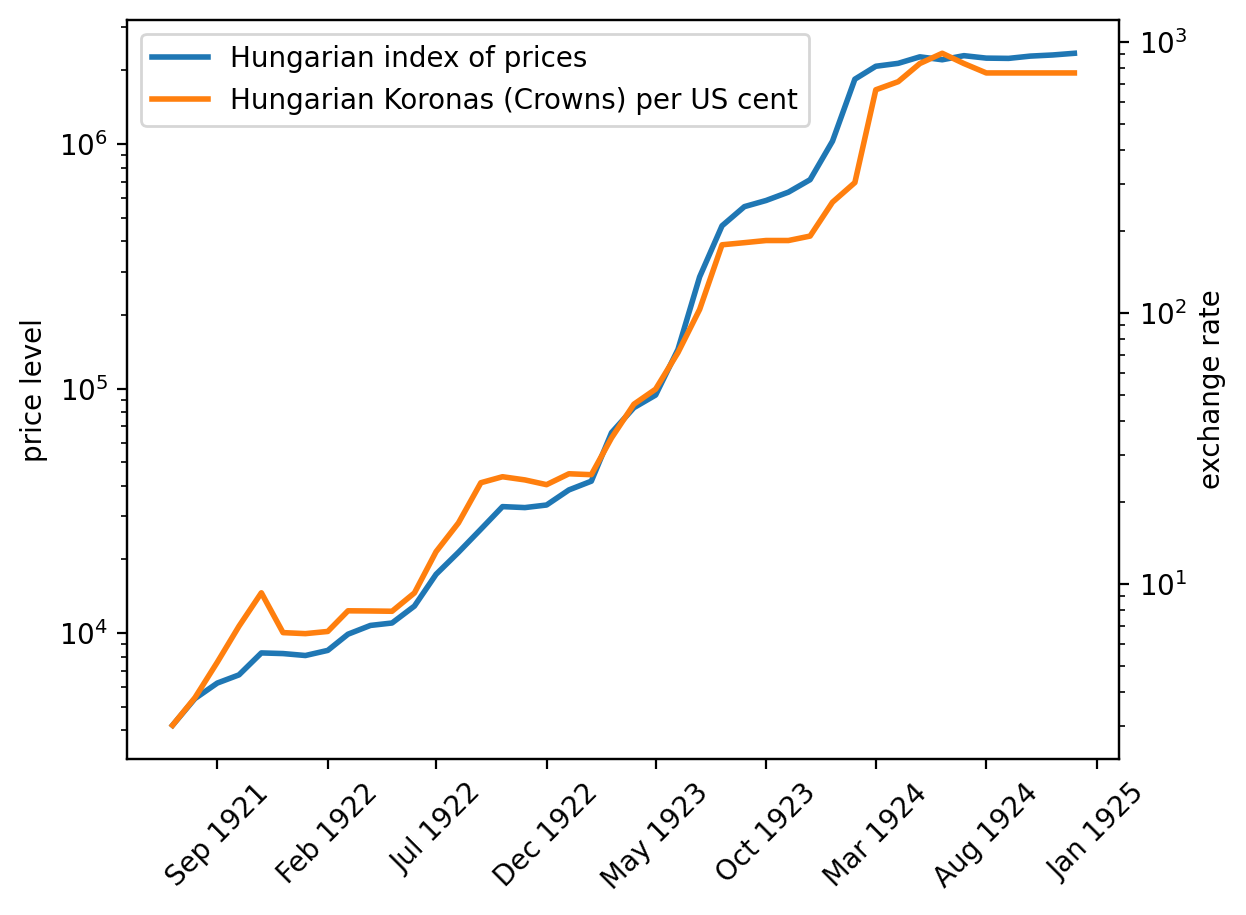

In [32]:
# 获取匈牙利的价格指数数据
p_seq = df_hun['Hungarian index of prices']
# 计算匈牙利克朗对美分的汇率
e_seq = 1 / df_hun['Cents per crown in New York']

# 定义图例标签
lab = ['Hungarian index of prices', 
       'Hungarian Koronas (Crowns) per US cent']

# 创建绘图
fig, ax = plt.subplots(dpi=200)
# 调用pe_plot函数绘制价格和汇率图
_ = pe_plot(p_seq, e_seq, df_hun.index, lab, ax)

# 显示图形
plt.show()

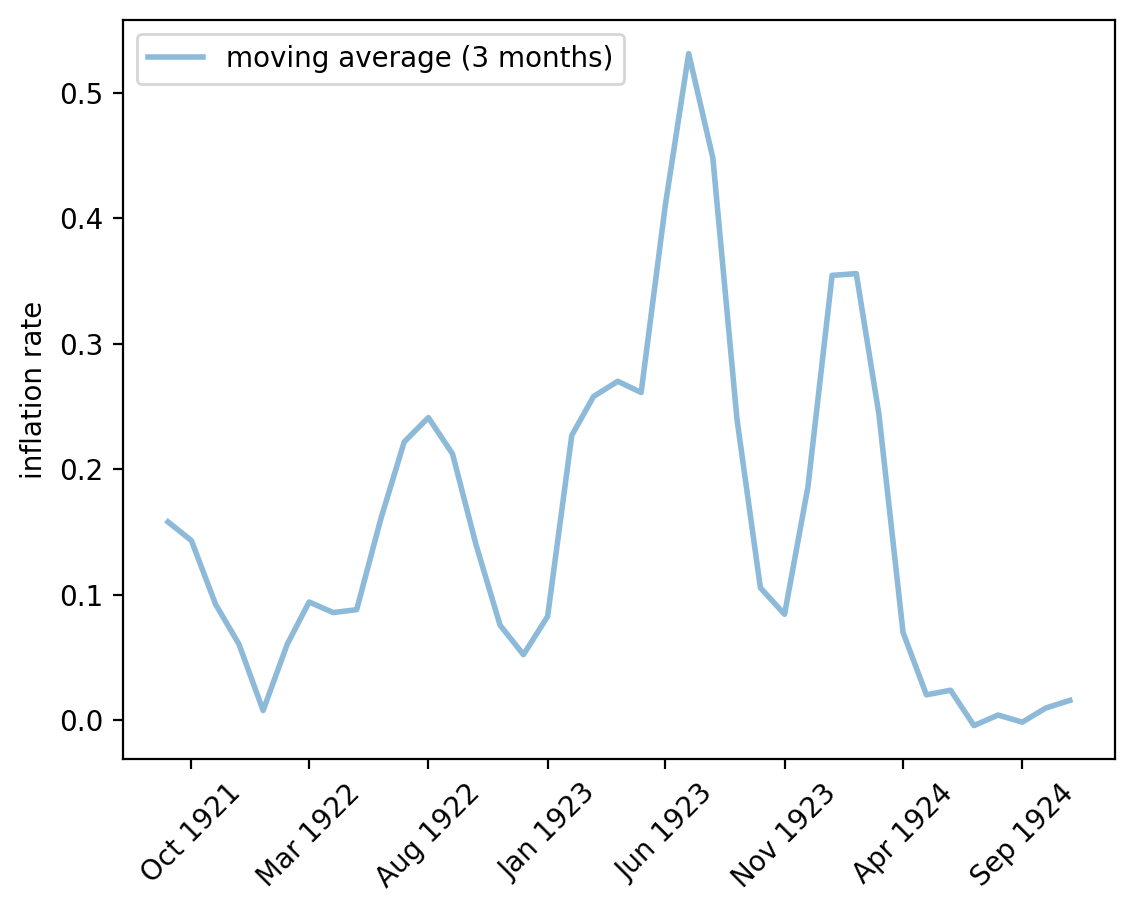

In [33]:
# 绘制移动平均图
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_hun.index, ax)

plt.show()

### Poland

### 波兰

The sources of our data for Poland are:

我们关于波兰的数据来源是：

- Table 3.15, price level $ \exp p $  

表3.15，价格水平 $ \exp p $
- Table 3.15, exchange rate  

表3.15，汇率


>**Note**

**注意**
>

请提供需要翻译的文本内容。
>To construct the price level series from the data in the spreadsheet, we instructed Pandas to follow the same procedures implemented in chapter 3 of [[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)]. We spliced together three series - Wholesale price index, Wholesale Price Index: On paper currency basis, and Wholesale Price Index: On zloty basis. We adjusted the sequence based on the price level ratio at the last period of the available previous series and glued them  to construct a single series.

为了根据电子表格中的数据构建价格水平序列，我们指导 Pandas 遵循 [[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)] 第 3 章中实施的相同程序。我们将三个序列拼接在一起——批发价格指数、基于纸币的批发价格指数和基于兹罗提的批发价格指数。我们根据前一个可用序列最后一个时期的价格水平比率调整了序列，并将它们粘合在一起，构建了一个单一序列。
We dropped the exchange rate after June 1924, when the zloty was adopted. We did this because we don’t have the price measured in zloty. We used the old currency in June to compute the exchange rate adjustment.

我们在1924年6月采用兹罗提后，放弃了汇率。我们这样做是因为我们没有以兹罗提计价的价格数据。我们使用了6月份的旧货币来计算汇率调整。


In [34]:
# 拼接三个不同单位的价格序列
p_seq1 = df_pol['Wholesale price index'].copy()
p_seq2 = df_pol['Wholesale Price Index: '
                'On paper currency basis'].copy()
p_seq3 = df_pol['Wholesale Price Index: ' 
                'On zloty basis'].copy()

# 获取非空部分的索引
mask_1 = p_seq1[~p_seq1.isna()].index[-1]
mask_2 = p_seq2[~p_seq2.isna()].index[-2]

# 计算调整比率
adj_ratio12 = (p_seq1[mask_1] / p_seq2[mask_1])
adj_ratio23 = (p_seq2[mask_2] / p_seq3[mask_2])

# 拼接三个序列
p_seq = pd.concat([p_seq1[:mask_1], 
                   adj_ratio12 * p_seq2[mask_1:mask_2], 
                   adj_ratio23 * p_seq3[mask_2:]])
p_seq = p_seq[~p_seq.index.duplicated(keep='first')]

# 计算汇率
e_seq = 1/df_pol['Cents per Polish mark (zloty after May 1924)']
e_seq[e_seq.index > '05-01-1924'] = np.nan

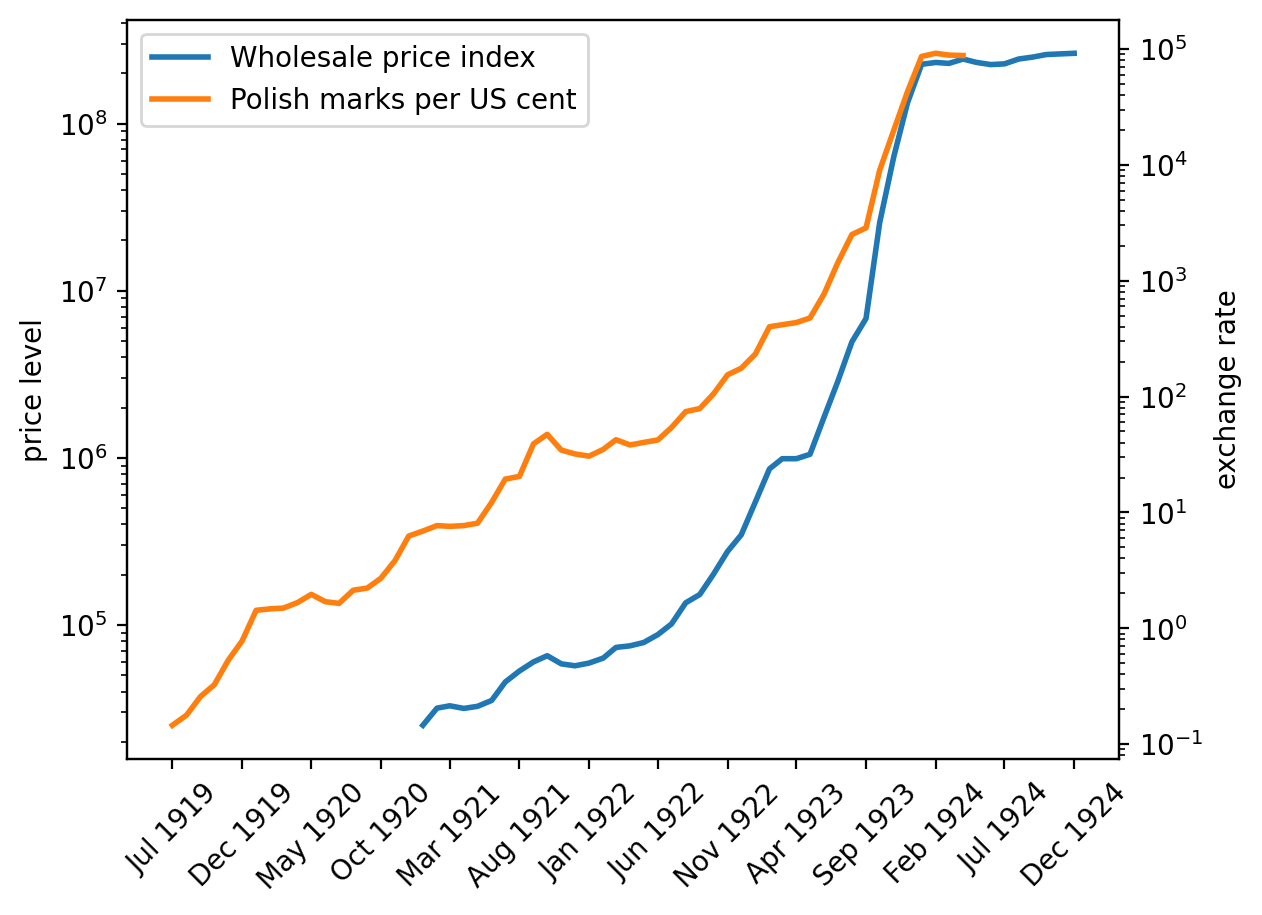

In [35]:
lab = ['Wholesale price index',  # 价格指数标签
       'Polish marks per US cent']  # 汇率标签

# 创建绘图
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_pol.index, lab, ax)  # 调用pe_plot函数绘制价格和汇率图

plt.show()  # 显示图表

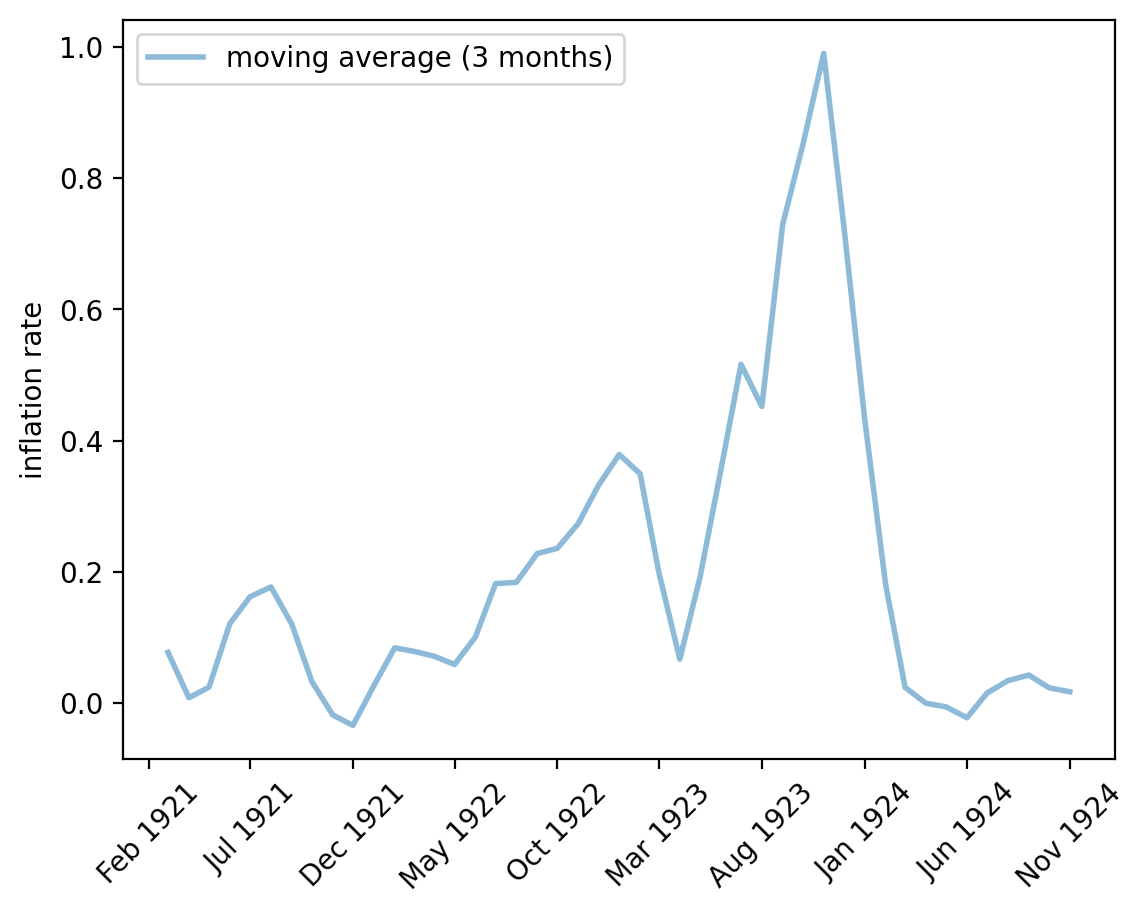

In [36]:
# 绘制移动平均图
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_pol.index, ax)

plt.show()

### Germany

### 德国

The sources of our data for Germany are the following tables from chapter 3 of [[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)]:

我们关于德国的数据来源是[[Sargent, 2013](https://intro.quantecon.org/zreferences.html#id13)]第3章中的以下表格：

- Table 3.18, wholesale price level $ \exp p $  

表3.18，批发价格水平 $ \exp p $
- Table 3.19, exchange rate  

表3.19，汇率


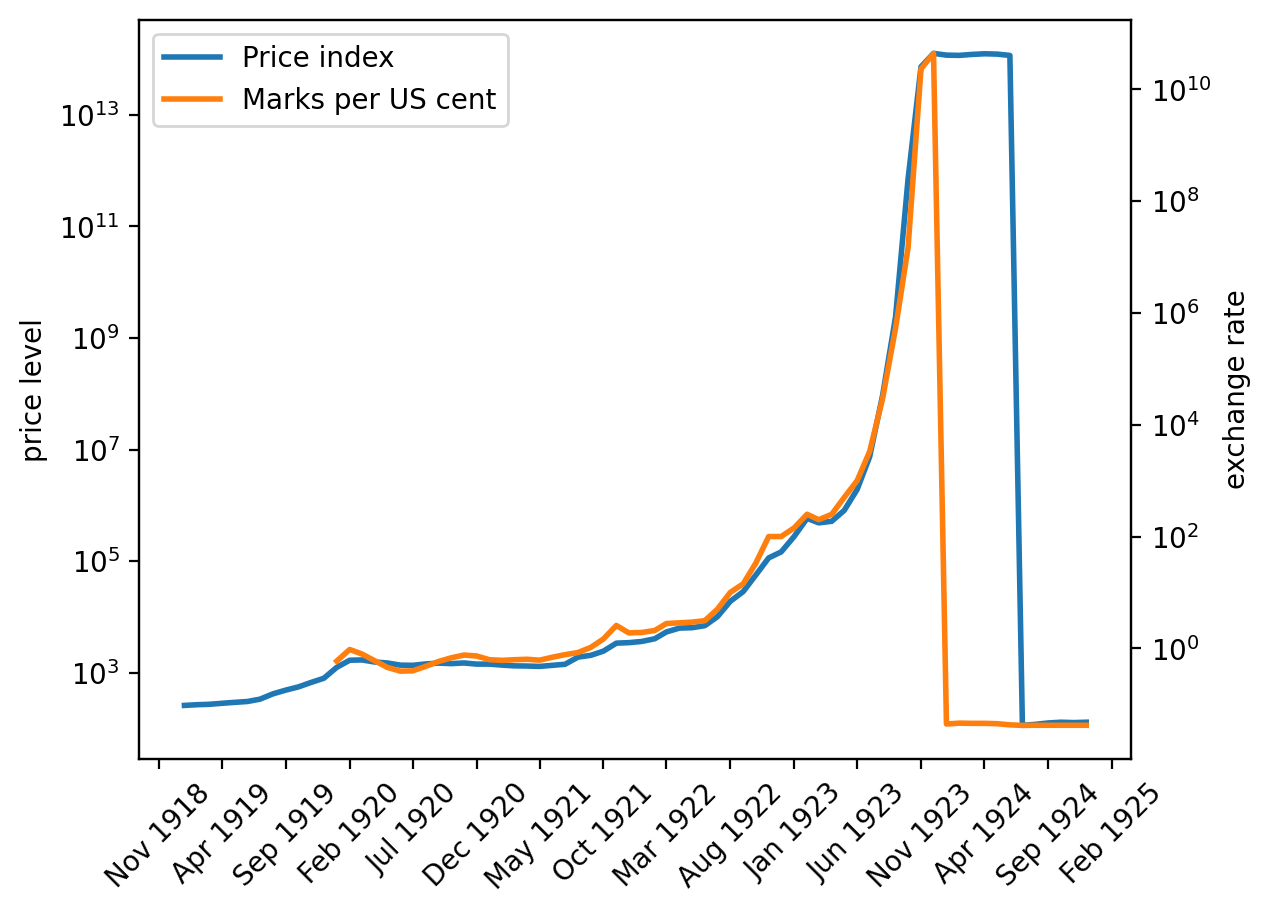

In [37]:
# 获取德国价格指数数据
p_seq = df_deu['Price index (on basis of marks before July 1924,'
                '  reichsmarks after)'].copy()
# 计算德国马克对美分的汇率
e_seq = 1/df_deu['Cents per mark']

# 设置图例标签
lab = ['Price index', 
       'Marks per US cent']

# 创建绘图
fig, ax = plt.subplots(dpi=200)
# 调用pe_plot函数绘制价格指数和汇率图
ax1 = pe_plot(p_seq, e_seq, df_deu.index, lab, ax)

# 显示图形
plt.show()

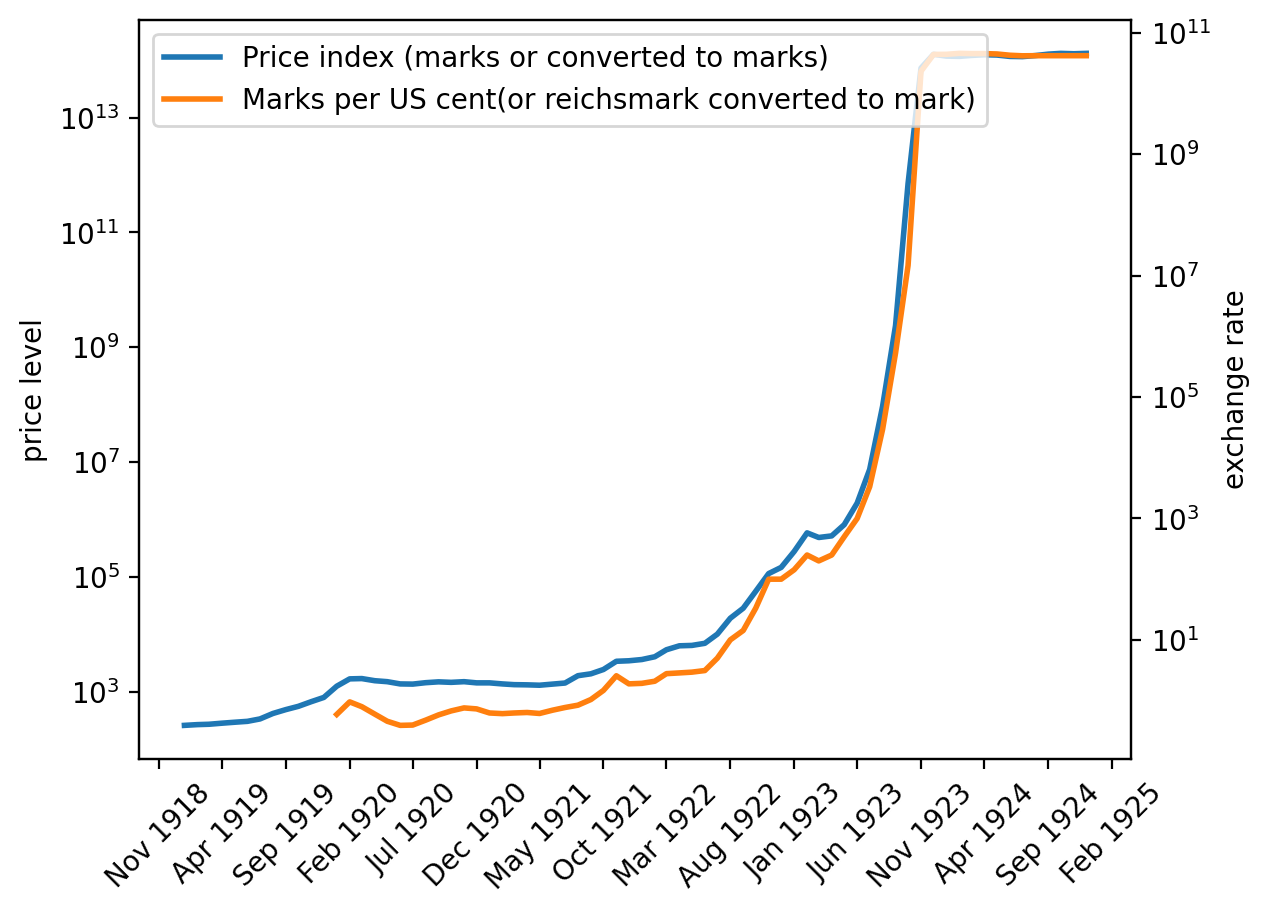

In [38]:
p_seq = df_deu['Price index (on basis of marks before July 1924,'
                '  reichsmarks after)'].copy()  # 获取德国价格指数数据并复制
e_seq = 1/df_deu['Cents per mark'].copy()  # 获取德国汇率数据并复制

# 根据货币改革调整价格水平和汇率
p_seq[p_seq.index > '06-01-1924'] = p_seq[p_seq.index 
                                          > '06-01-1924'] * 1e12  # 1924年7月1日后的价格水平乘以1e12
e_seq[e_seq.index > '12-01-1923'] = e_seq[e_seq.index 
                                          > '12-01-1923'] * 1e12  # 1923年12月1日后的汇率乘以1e12

lab = ['Price index (marks or converted to marks)', 
       'Marks per US cent(or reichsmark converted to mark)']  # 设置图例标签

# 创建绘图
fig, ax = plt.subplots(dpi=200)
ax1 = pe_plot(p_seq, e_seq, df_deu.index, lab, ax)  # 调用pe_plot函数绘制价格和汇率图

plt.show()  # 显示图表

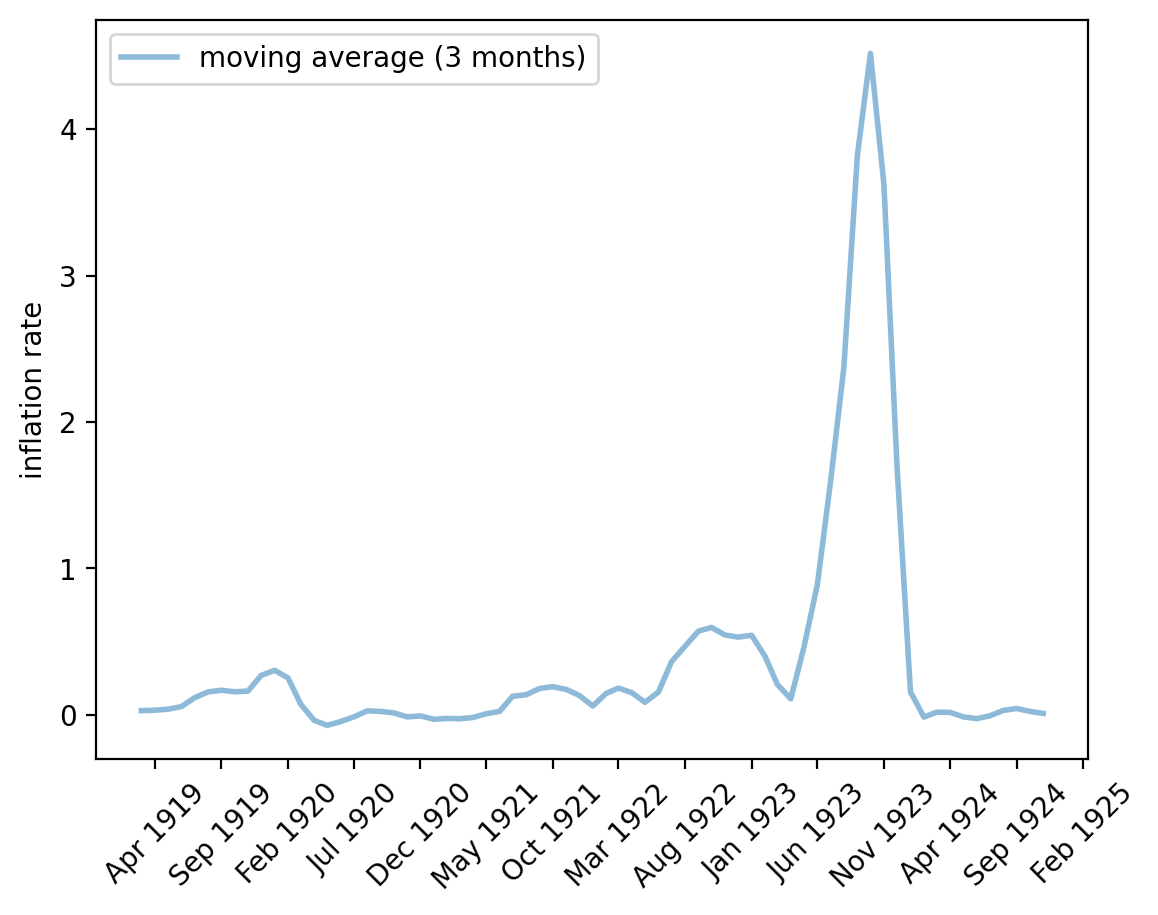

In [39]:
# 绘制移动平均图
fig, ax = plt.subplots(dpi=200)
_ = pr_plot(p_seq, df_deu.index, ax)

plt.show()

## Starting and stopping big inflations

## 启动和停止大规模通货膨胀

It is striking how *quickly* (log) price levels in Austria, Hungary, Poland, and Germany leveled off after rising so quickly.

令人震惊的是，奥地利、匈牙利、波兰和德国的（对数）价格水平在迅速上涨后，竟然如此*迅速地*趋于平稳。

These “sudden stops” are also revealed by the permanent drops in three-month moving averages of inflation for the four countries plotted above.

上述四个国家的三个月移动平均通胀率的永久性下降也揭示了这些“突然停止”现象。

In addition, the US dollar exchange rates for each of the four countries shadowed their price levels.

此外，这四个国家的美元汇率均与其价格水平保持一致。

>**Note**

**注意**
>

请提供需要翻译的文本。
>This pattern is an instance of a force featured in the [purchasing power parity](https://en.wikipedia.org/wiki/Purchasing_power_parity) theory of exchange rates.

这种模式是汇率[购买力平价](https://en.wikipedia.org/wiki/Purchasing_power_parity)理论中一个力量的实例。

Each of these big inflations seemed to have “stopped on a dime”.

每一次大规模的通货膨胀似乎都“戛然而止”。

Chapter 3 of [[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)] offers an explanation for this remarkable pattern.

[[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)] 的第三章对这一显著模式提供了解释。

In a nutshell, here is the explanation offered there.

简而言之，这就是那里提供的解释。

After World War I, the United States was on a gold standard.

第一次世界大战后，美国实行了金本位制。

The US government stood ready to convert a dollar into a specified amount of gold on demand.

美国政府随时准备根据需求将美元兑换成特定数量的黄金。

Immediately after World War I, Hungary, Austria, Poland, and Germany were not on the gold standard.

第一次世界大战结束后，匈牙利、奥地利、波兰和德国并未采用金本位制。

Their currencies were “fiat” or “unbacked”, meaning that they were not backed by credible government promises to convert them into gold or silver coins on demand.

他们的货币是“法定”或“无担保”的，这意味着它们没有可靠的政府承诺，无法在需要时将其兑换成金币或银币。

The governments printed new paper notes to pay for goods and services.

政府印制了新的纸币来支付商品和服务。

>**Note**

**注意**
>

请提供需要翻译的文本。
>Technically the notes were “backed” mainly by treasury bills. But people could not expect that those treasury bills would be paid off by levying taxes, but instead by printing more notes or treasury bills.

从技术上讲，这些钞票主要由国库券“支持”。但人们无法指望这些国库券会通过征税来偿还，而是通过印刷更多的钞票或国库券来偿还。

This was done on such a scale that it led to a depreciation of the currencies of spectacular proportions.

这一举措的规模如此之大，以至于导致了货币的惊人贬值。

In the end, the German mark stabilized at 1 trillion ($ 10^{12} $) paper marks to the prewar gold mark, the Polish mark at 1.8 million paper marks to the gold zloty, the Austrian crown at 14,400 paper crowns to the prewar Austro-Hungarian crown, and the Hungarian krone at 14,500 paper crowns to the prewar Austro-Hungarian crown.

最终，德国马克稳定在1万亿（$10^{12}$）纸币马克兑换战前金马克的水平，波兰马克为180万纸币马克兑换1金兹罗提，奥地利克朗为14,400纸币克朗兑换战前奥匈帝国克朗，匈牙利克朗则为14,500纸币克朗兑换战前奥匈帝国克朗。

Chapter 3 of [[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)]  described deliberate changes in policy that Hungary, Austria, Poland, and Germany made to end their hyperinflations.

[[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)] 的第三章描述了匈牙利、奥地利、波兰和德国为结束恶性通货膨胀而采取的有意政策变化。

Each government stopped printing money to pay for goods and services once again and made its currency convertible to the US dollar or the UK pound.

各国政府再次停止印刷货币以支付商品和服务，并使其货币可兑换为美元或英镑。

The story told in [[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)] is grounded in a *monetarist theory of the price level* described in [A Monetarist Theory of Price Levels](https://intro.quantecon.org/cagan_ree.html) and [Monetarist Theory of Price Levels with Adaptive Expectations](https://intro.quantecon.org/cagan_adaptive.html).

[[Sargent and Velde, 2002](https://intro.quantecon.org/zreferences.html#id12)] 中讲述的故事基于一种*价格水平的货币主义理论*，该理论在[价格水平的货币主义理论](https://intro.quantecon.org/cagan_ree.html)和[适应性预期下的价格水平货币主义理论](https://intro.quantecon.org/cagan_adaptive.html)中有所描述。

Those lectures discuss theories about what owners of those rapidly depreciating currencies were thinking and how their beliefs shaped responses of inflation to government monetary and fiscal policies.

这些讲座探讨了那些持有迅速贬值货币的人们的想法，以及他们的信念如何影响了通货膨胀对政府货币和财政政策的反应。
